## Import Required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load csv file

In [3]:
#reading the data
loan_data = pd.read_csv("loan.csv")

C:\Users\pc\AppData\Local\Temp\ipykernel_6192\2374378245.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("loan.csv")


## Basic information about csv file for analysis

In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan_data.shape

(39717, 111)

## Cleaning of data

#### Check for columns with null values

In [6]:
round((100*loan_data.isnull().sum())/len(loan_data.index))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

#### We found manu columns with null values, Let's remove thoes columns.

In [7]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### From above output we check that there are now only 57 columns are remaining.

#### Check for columns with single values, since these single values will not provide meaningful information.

In [8]:
loan_data.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [9]:
loan_data = loan_data.loc[:, loan_data.nunique()>1]
print(loan_data.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_rec_prncp total_rec_int  \
0   10.65%       162.87     B        B2  ...         5000.00        863.16   
1   15.27%        59.83     C        C4  ...          456.46        435.17   
2   15.96%        84.33     C        C5  ...         2400.00        605.67   
3   13.49%       339.31     C        C1  ...        10000.00       2214.92   
4   12.69%        67.79     B        B5  ...         2475.94       1037.39   

  total_rec_late_fee  recoveries collection_recovery_fee last_

#### We now have 47 columns. Some of them are related to post approval of loan
- "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "out_prncp_inv" , "total_pymnt_inv" columns arn't related to loan defaulting analysis. We can drop these.
- "desc" is description column and not needed. Can be dropped.
- "funded_amnt" can be removed since we have "funded_amnt_inv" column.

#### List of post-approval features
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record

In [10]:
loan_data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [11]:
loan_data.shape

(39717, 22)

In [12]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

#### Objective is to analyse who is more likely to default, So we can remove "Current" column.

In [13]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### Checking for missing values

In [14]:
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt               0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

#### Handling Missing values
 - Columns "emp_length", "revol_util" have missing values. Find out what type of data it has.

In [15]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt_inv       38577 non-null  float64
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  earliest_cr_line      38

In [16]:
# Find Mode of emp_length
print(f'Mode is ===> {loan_data.emp_length.mode()[0]}')
# Get total values in emp_length column
loan_data.emp_length.value_counts()

Mode is ===> 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

#### Mode has very high occurences, We can substitute this value against missing data.

In [17]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [18]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

In [19]:
loan_data['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

#### Standardizing the data 
- "revol_util" column has continues values.
- "emp_length" <1 year is assumed as 0 and 10+ years assumed as 10

In [20]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))

In [21]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [22]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [23]:
print(loan_data['revol_util'].head(1))
print(loan_data['int_rate'].head(1))
print(loan_data['emp_length'].head(1))

0    83.7
Name: revol_util, dtype: float64
0    10.65
Name: int_rate, dtype: float64
0    10
Name: emp_length, dtype: int64


## Outlier Treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x1681b2921e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1681b291c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1681b292420>],
 'medians': [<matplotlib.lines.Line2D at 0x1681b291610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1681b291310>],
 'means': []}

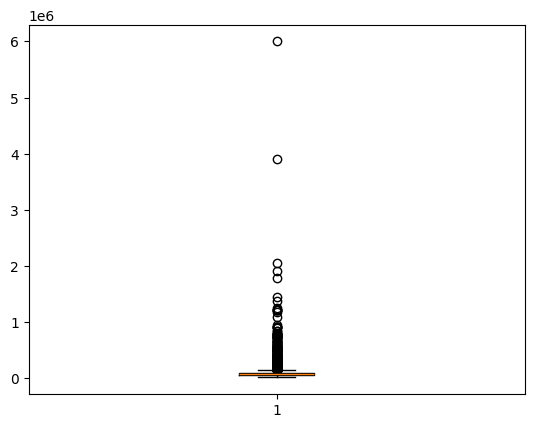

In [24]:
# sns.boxplot(loan_data['annual_inc'])
plt.boxplot(loan_data['annual_inc'])

#### We found presence of outlier.
- Check quantile info and take an appropriate action

In [25]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [26]:
quantile_95 = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= quantile_95 ]

{'whiskers': [<matplotlib.lines.Line2D at 0x1681a88d9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1681a88df70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1681a88d850>],
 'medians': [<matplotlib.lines.Line2D at 0x1681a88e510>],
 'fliers': [<matplotlib.lines.Line2D at 0x1681a88e810>],
 'means': []}

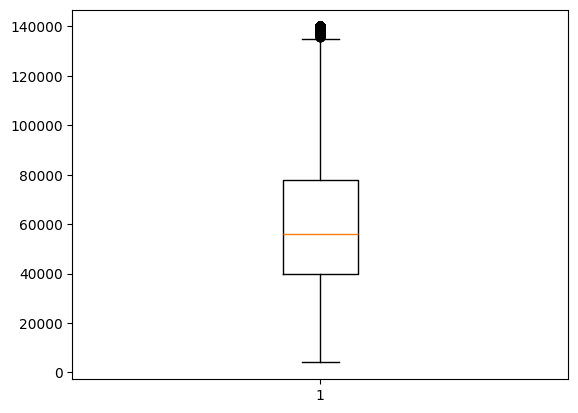

In [27]:
plt.boxplot(loan_data['annual_inc'])


#### "annual_inc" column looks good now, Check for outliers in below columns
- dti
- loan_amnt
- funded_amnt_inv 

{'whiskers': [<matplotlib.lines.Line2D at 0x1681aa70980>,
 'caps': [<matplotlib.lines.Line2D at 0x1681aa723f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1681aa71d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1681aa729f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1681aa72cc0>],
 'means': []}

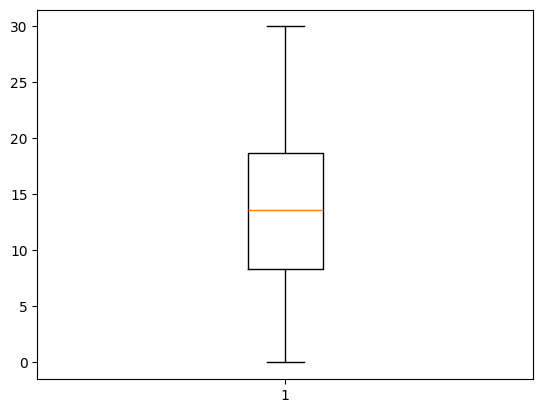

In [28]:
plt.boxplot(loan_data['dti'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1681aadd700>,
 'caps': [<matplotlib.lines.Line2D at 0x16878093e00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1681aa716a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1681aade240>],
 'fliers': [<matplotlib.lines.Line2D at 0x1681aade540>],
 'means': []}

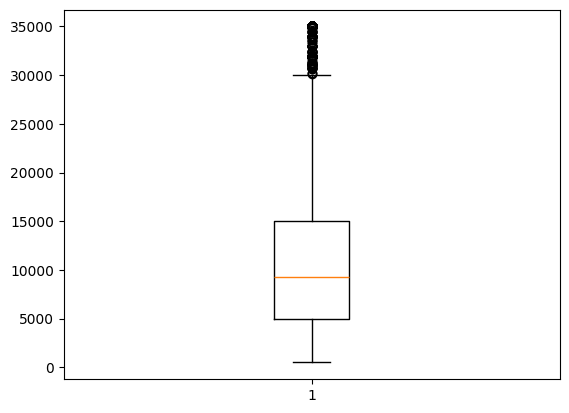

In [29]:
plt.boxplot(loan_data['loan_amnt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1681ab51100>,
 'caps': [<matplotlib.lines.Line2D at 0x1681ab51670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1681ab50e90>],
 'medians': [<matplotlib.lines.Line2D at 0x1681ab51be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1681ab51e80>],
 'means': []}

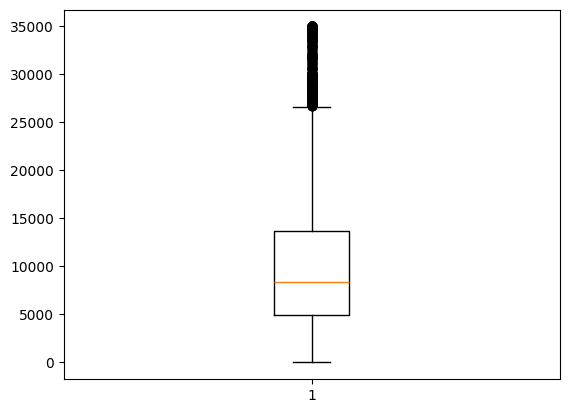

In [30]:
plt.boxplot(loan_data['funded_amnt_inv'])

## Visualizing Categorical Data 
### extracting subgrade from the sub_grade variable int level.

<Axes: xlabel='loan_status', ylabel='count'>

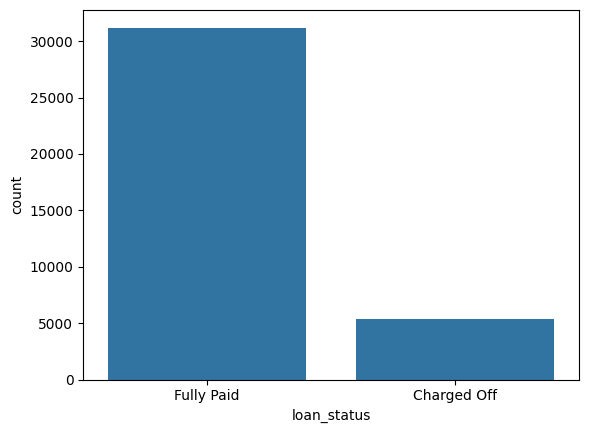

In [31]:
sns.countplot(x = 'loan_status', data = loan_data)

In [32]:
loan_data['sub_grade'] = pd.to_numeric(loan_data['sub_grade'].apply(lambda x : x[-1]))
loan_data['sub_grade'].head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

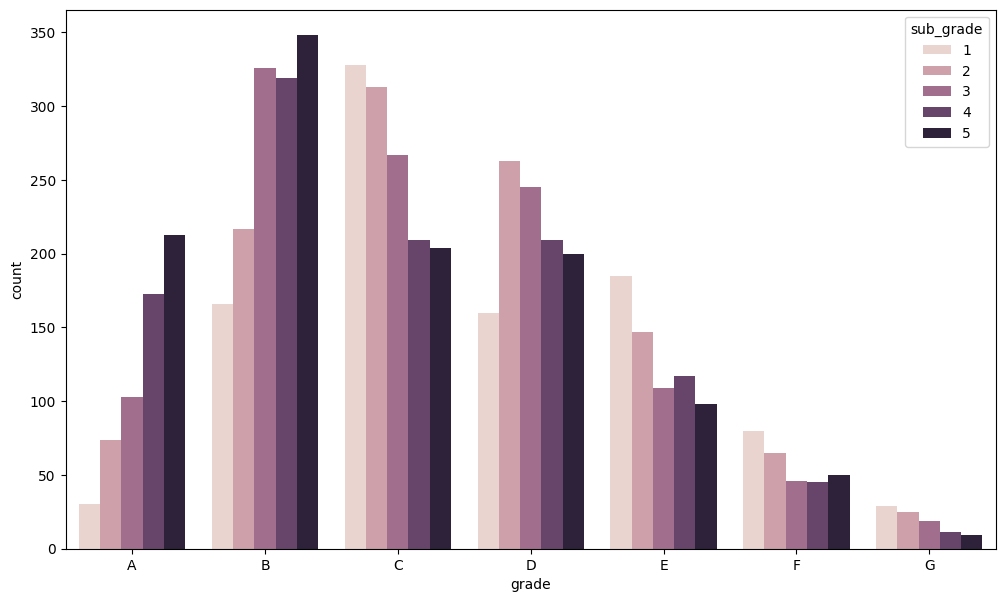

In [33]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data['loan_status'] == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

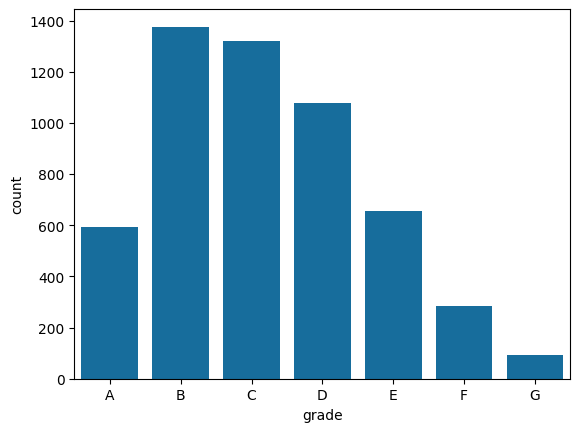

In [34]:
sns.set_palette('colorblind')
sns.countplot(x = 'grade', data = loan_data[loan_data['loan_status'] == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

####  Analyzing home_ownership

In [35]:
#checking unique values for home_ownership
loan_data['home_ownership'].value_counts()

home_ownership
RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          91
NONE            3
Name: count, dtype: int64

#### Replace 3 'NONE' values with 'OTHER' value

In [36]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [37]:
#checking unique values for home_ownership again
# pd.value_counts(loan_data['home_ownership'])
loan_data['home_ownership'].value_counts()

home_ownership
RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          94
Name: count, dtype: int64

<Axes: xlabel='home_ownership', ylabel='count'>

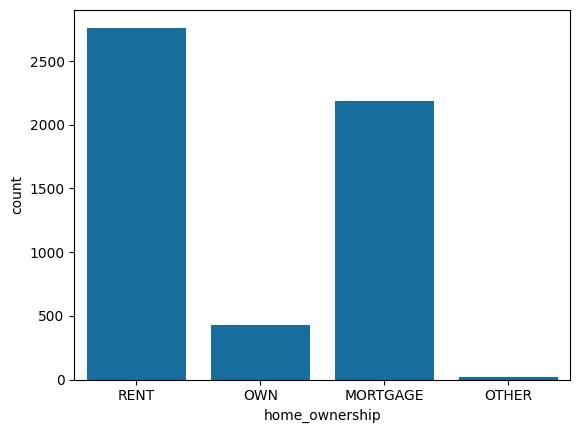

In [38]:
sns.countplot(x = 'home_ownership', data = loan_data[loan_data['loan_status'] == 'Charged Off'])

####  Analyzing purpose

<Axes: xlabel='count', ylabel='purpose'>

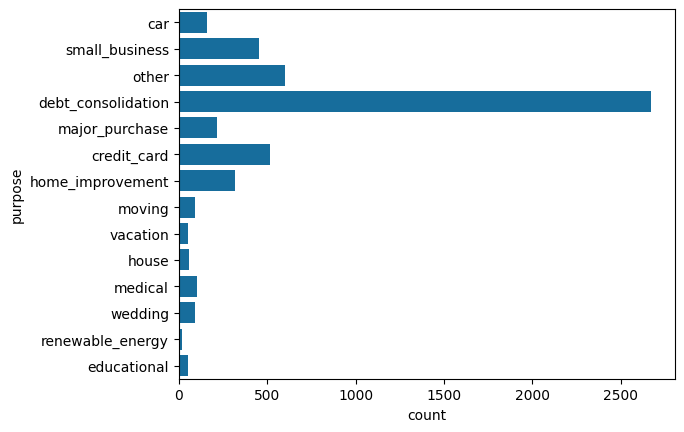

In [39]:
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

#### Creating bins for some numerical variable to make them categorical

In [40]:
loan_data['annual_inc'].describe()

count     36606.000000
mean      60890.563839
std       27741.337421
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      140004.000000
Name: annual_inc, dtype: float64

In [41]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [42]:
# Viewing new bins created
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,3,0,83.7,9,0.0,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,3,0,9.4,4,0.0,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,0,98.5,10,0.0,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,10,0,21.0,37,0.0,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,9,0,28.3,12,0.0,5%-9%,2-10,20-40,2-20,31k-58k


#### Analyzing interest rate wrt the interest rate bins created

<Axes: xlabel='int_rate_groups', ylabel='count'>

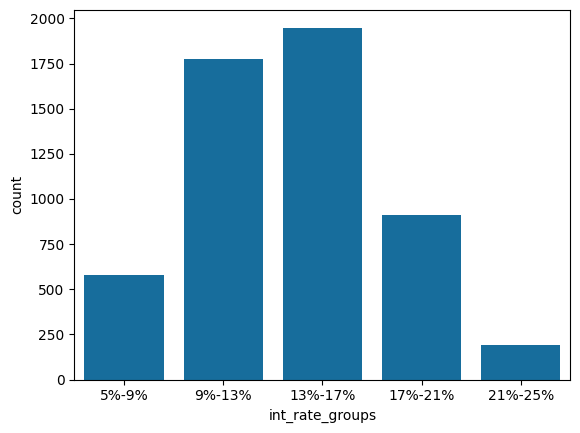

In [43]:
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='emp_length', ylabel='count'>

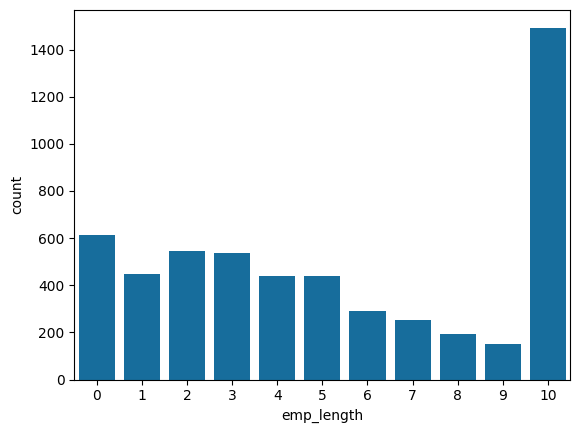

In [44]:
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])


#### Analyzing open_acc,revol_util,total_acc,annual_inc

<Axes: xlabel='open_acc_groups', ylabel='count'>

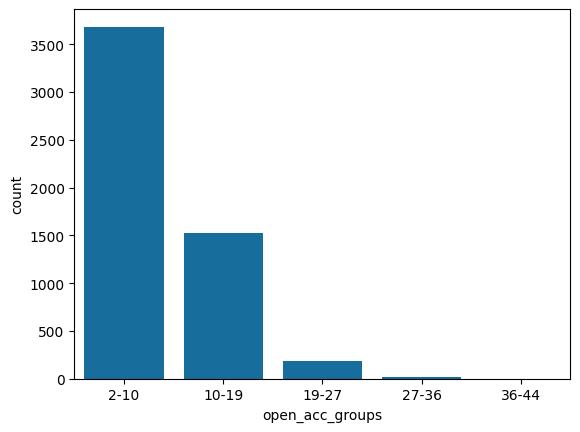

In [45]:
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

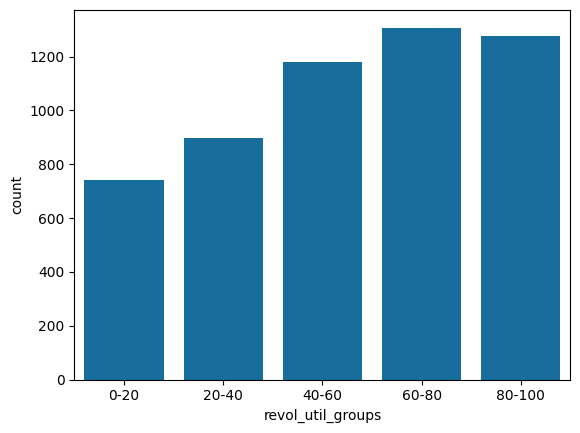

In [46]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

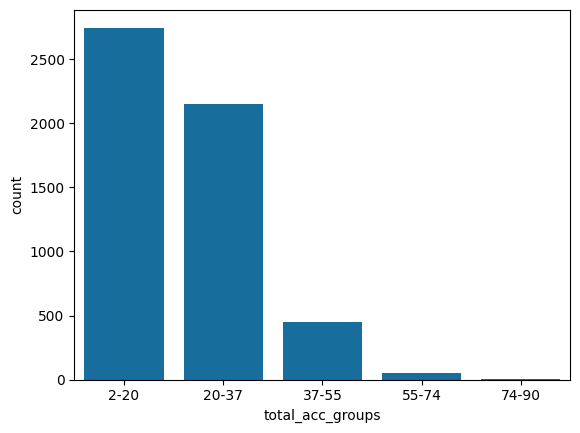

In [47]:
sns.countplot(x='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

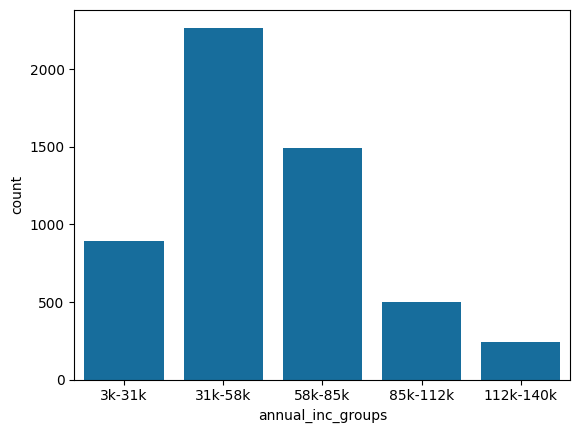

In [48]:
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

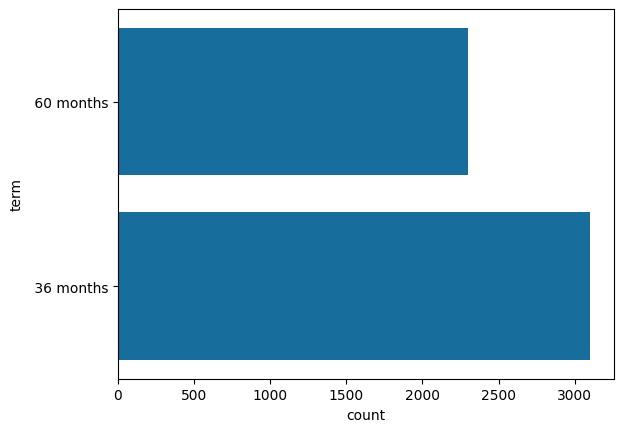

In [49]:
sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

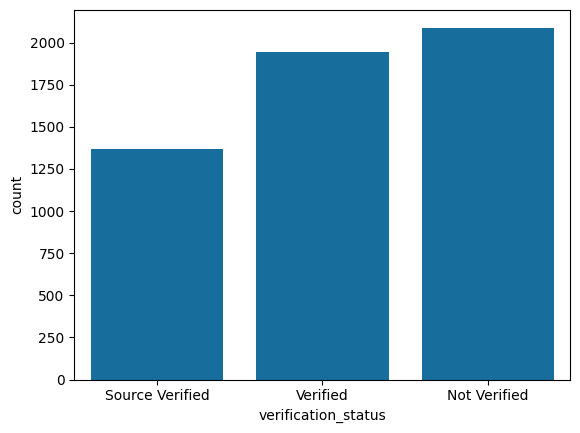

In [50]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

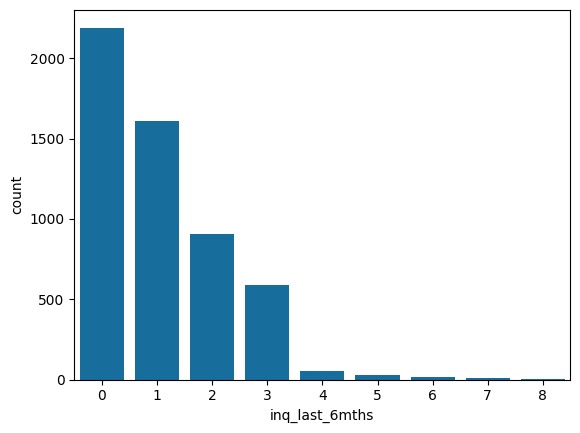

In [51]:
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

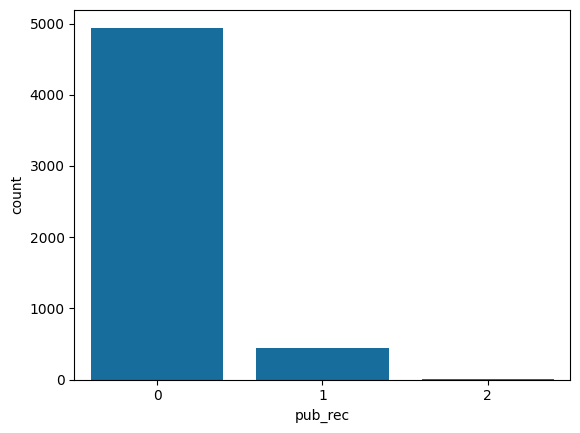

In [52]:
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Extracting month and years


In [53]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

In [54]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,pub_rec_bankruptcies,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,83.7,9,0.0,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,9.4,4,0.0,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,98.5,10,0.0,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,21.0,37,0.0,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,28.3,12,0.0,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011


<Axes: xlabel='issue_month', ylabel='count'>

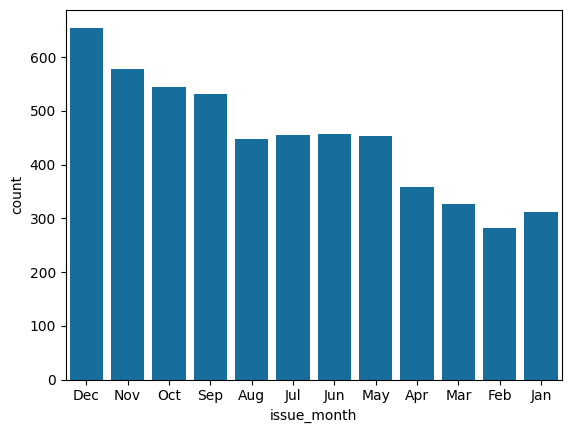

In [55]:
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='issue_year', ylabel='count'>

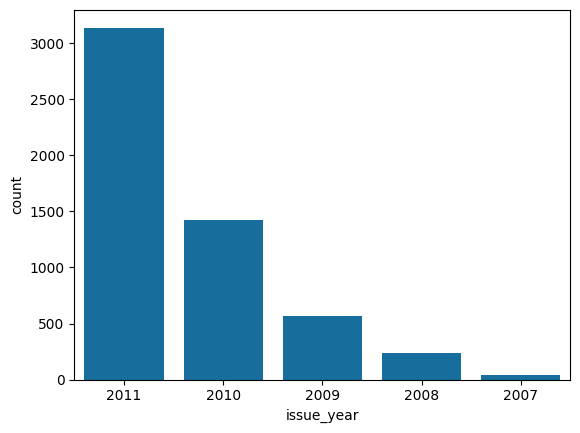

In [56]:
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Maximum number of defaults occured when the loan was issued in dec 2011.
##### Analyzing installment,dti, loan_amnt 


In [57]:
loan_data['dti'].describe()

count    36606.000000
mean        13.450146
std          6.660418
min          0.000000
25%          8.350000
50%         13.580000
75%         18.720000
max         29.990000
Name: dti, dtype: float64

In [58]:
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

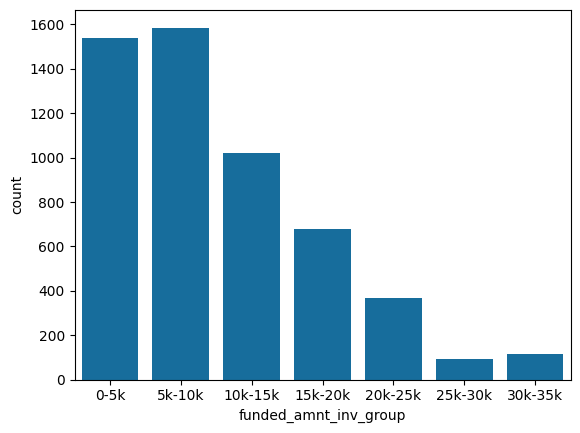

In [59]:
sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

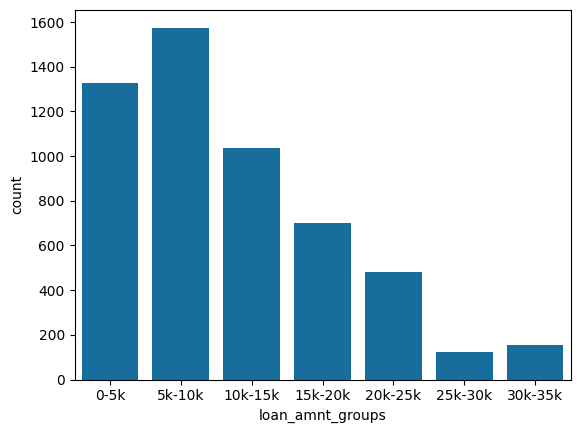

In [60]:
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

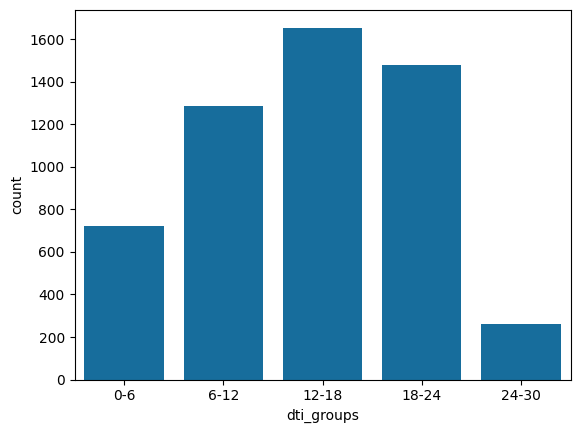

In [61]:
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

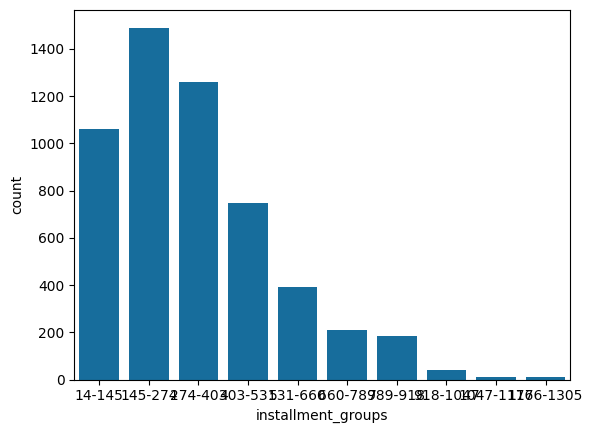

In [62]:
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

# Observations
#### Below are observations based on charged off loans. More probability of defaulting when -
- Applicant 'RENT' the house
- Applicant takes loan to clear other loan
- Applicant paying 13%-17% interest
- Applicant employment length of 10 or greater than 10
- Dti is between 12-18
- Term is 36 months
- Grade is 'B' and subgrade is 'B5'
- loan amount group is btween 5k-10k

#### Interestingly most debts are charged-off during year 2011
- Assuming above data is US applicants, It may be due to finantial crysis in 2011

## Analyse annual income with other colums for more insights

#### 1.Annual income vs loan purpose

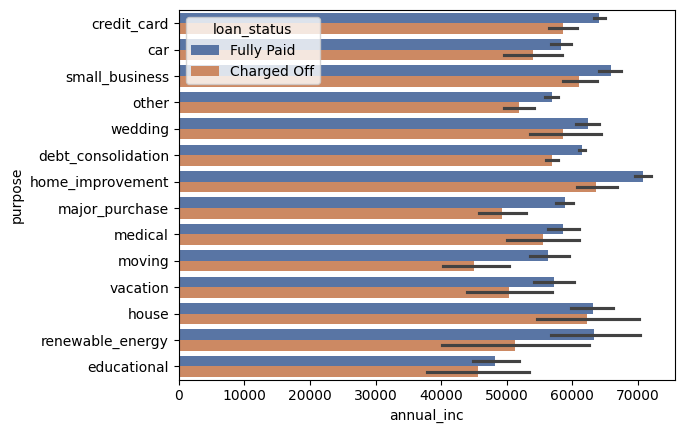

In [63]:
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest. 
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

#### 2.Annual income vs home ownership

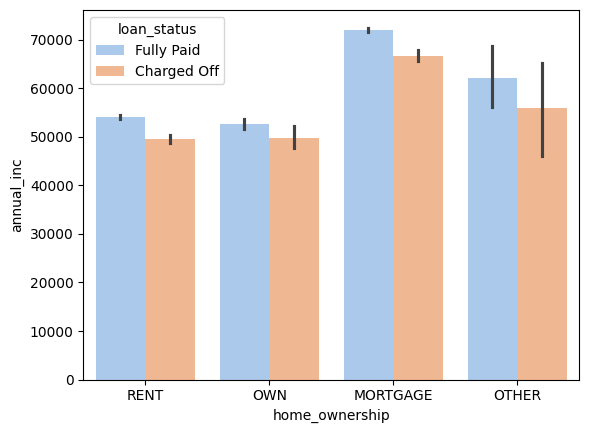

In [64]:
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

### Annual Income vs Loan amount

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

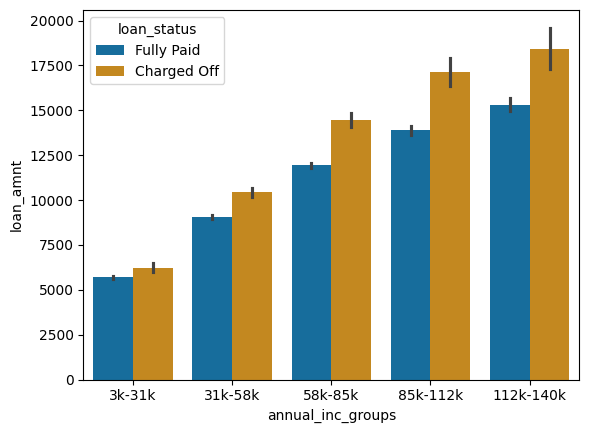

In [65]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_data)

#### 3. Annual income vs int_rate

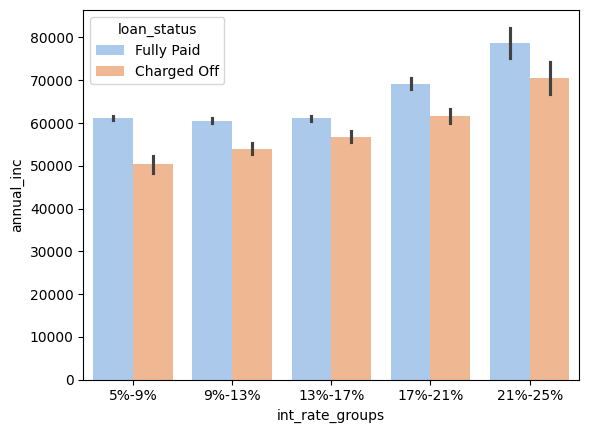

In [75]:
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

## Analysing loan_amount with other columns for more insights 

#### 1.Loan Amount vs Interest Rate

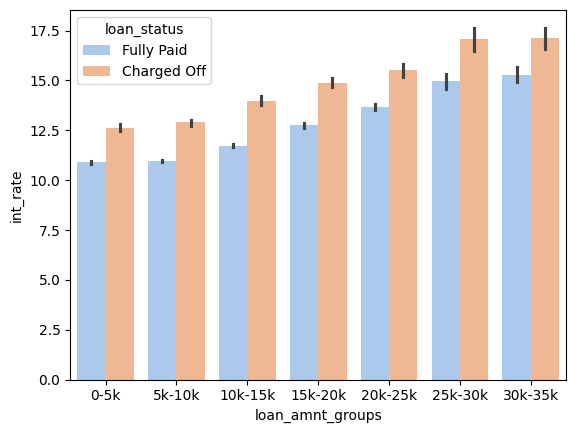

In [76]:
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

#### 2.Loan vs Loan purpose

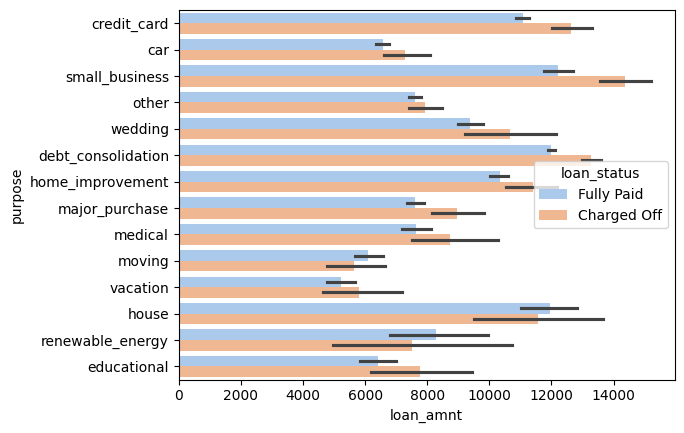

In [68]:
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### 3.Loan vs House Ownership

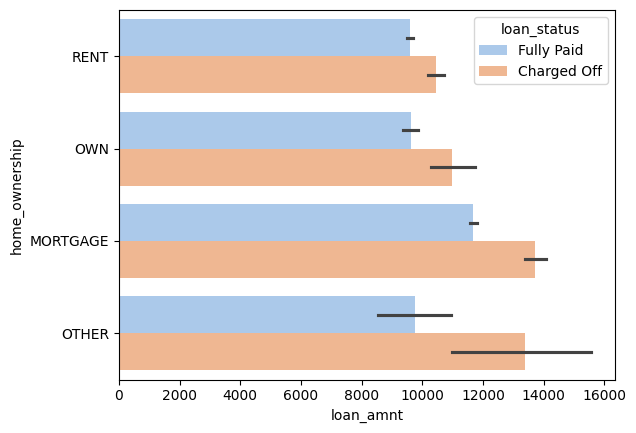

In [69]:
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### 4.Loan amount vs month issued and year issued

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

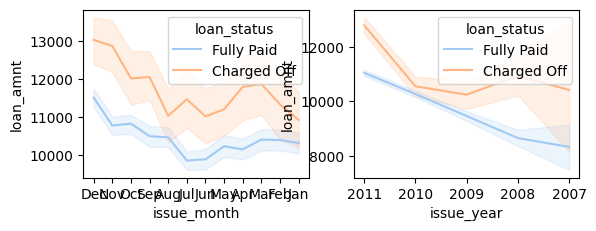

In [70]:
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")


#### 5.Loan amount vs Grade

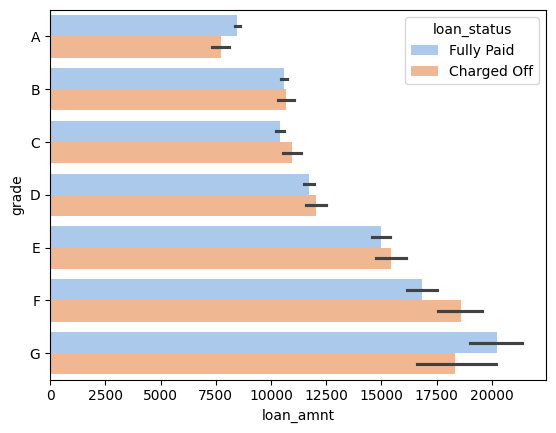

In [71]:
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

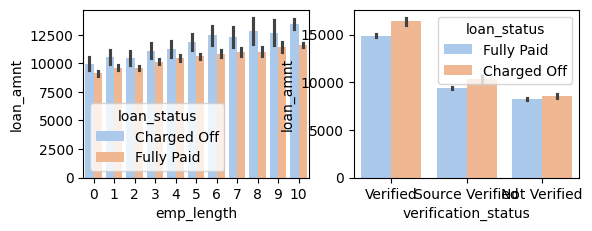

In [72]:
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")


#### Longer working history applicants geting higher amount loan approved, Verified applicants have higher loan approved to them.

#### grade vs interest rate

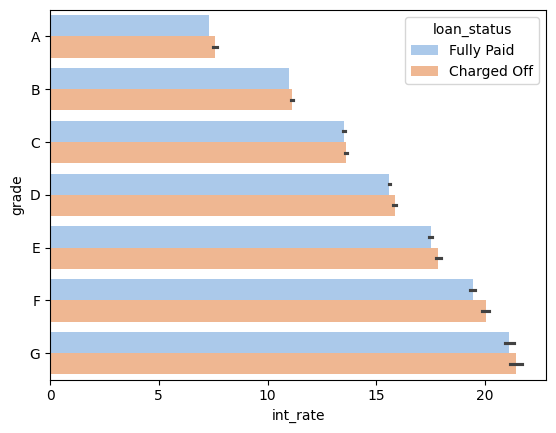

In [73]:
sns.barplot(data =loan_data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 640x480 with 0 Axes>

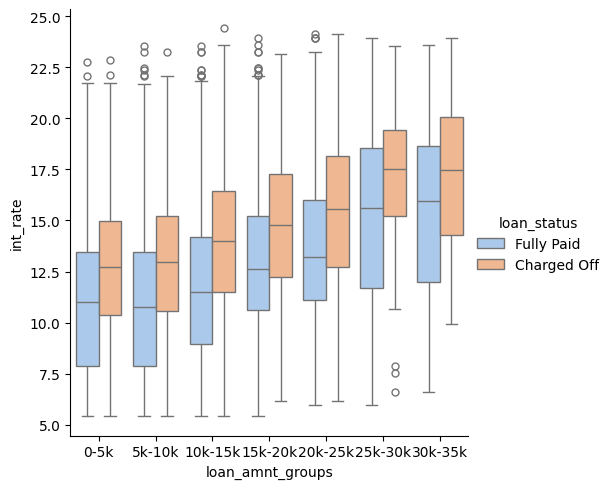

In [74]:
plt.tight_layout()
sns.catplot(data =loan_data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

#### Interest rate for charged off loans is higher than fully paid loans in loan_amnt_groups, This can be the driving factor of loan defaulting.

# More Observations
#### Probability of defaulting when
- Applicants have income between 60k-70k and
  - Taking loan for 'Home_improvement'
  - home_ownership is 'MORTGAGE' and loan of 14-16K  
  - Paying interest rate of 21-24%
- Applicants taking loan for 'small_business' purpose when loan amount is higher than 13K
- Grade is 'F' and loan amount is between 16K-20K
- Employment length is 10Years and above and loan amount is between 10K-12K